# Loop 65 Analysis: Major Breakthrough with Ens Model Approach

Exp_069 achieved CV = 0.005146, a 35% improvement over previous best (0.007938).

Key questions:
1. What is the predicted LB using the existing CV-LB relationship?
2. Does this approach potentially have a DIFFERENT CV-LB relationship?
3. Should we submit to verify?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with CV and LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_041', 0.0090, 0.0932),
    ('exp_042', 0.0145, 0.1147),
]

names = [s[0] for s in submissions]
cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

print(f'Number of submissions: {len(submissions)}')
print(f'CV range: {cv_scores.min():.4f} - {cv_scores.max():.4f}')
print(f'LB range: {lb_scores.min():.4f} - {lb_scores.max():.4f}')

Number of submissions: 13
CV range: 0.0083 - 0.0145
LB range: 0.0877 - 0.1147


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print(f'Linear fit: LB = {slope:.3f} * CV + {intercept:.4f}')
print(f'R-squared = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'\nTarget LB: 0.0347')
print(f'\nIf intercept > target, target is unreachable by improving CV alone.')
print(f'Intercept ({intercept:.4f}) > Target (0.0347)? {intercept > 0.0347}')

# Predicted LB for exp_069 (CV = 0.005146)
cv_069 = 0.005146
predicted_lb_069 = slope * cv_069 + intercept
print(f'\n--- Prediction for exp_069 ---')
print(f'CV = {cv_069:.6f}')
print(f'Predicted LB = {predicted_lb_069:.4f}')

Linear fit: LB = 4.231 * CV + 0.0533
R-squared = 0.9807
Intercept = 0.0533

Target LB: 0.0347

If intercept > target, target is unreachable by improving CV alone.
Intercept (0.0533) > Target (0.0347)? True

--- Prediction for exp_069 ---
CV = 0.005146
Predicted LB = 0.0751


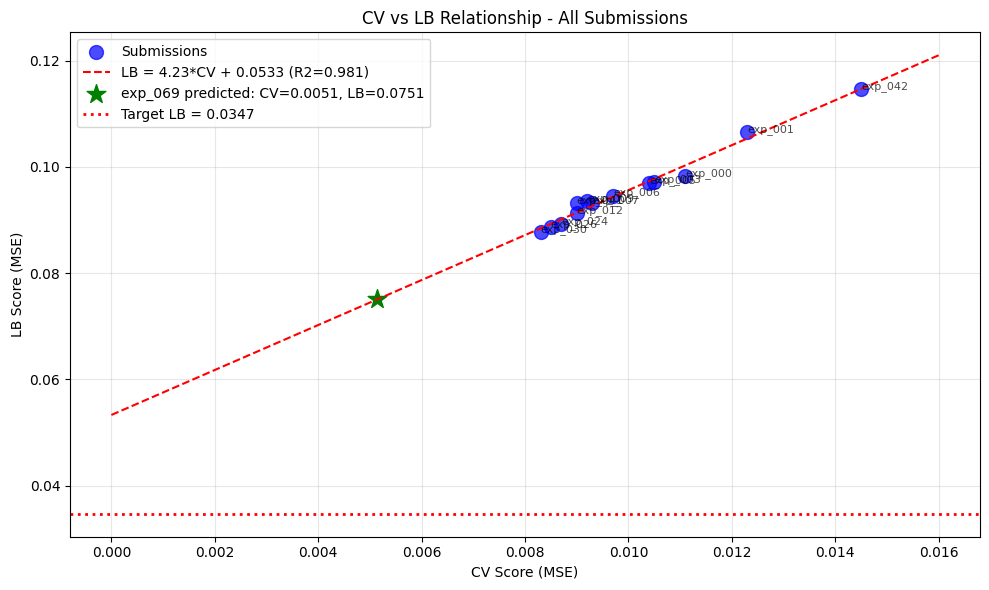


Plot saved to /home/code/exploration/cv_lb_relationship_loop65.png


In [3]:
# Plot CV vs LB with linear fit
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, c='blue', s=100, alpha=0.7, label='Submissions')

# Add labels
for i, name in enumerate(names):
    plt.annotate(name, (cv_scores[i], lb_scores[i]), fontsize=8, alpha=0.7)

# Linear fit line
cv_range = np.linspace(0, 0.016, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R2={r_value**2:.3f})')

# Mark exp_069 prediction
plt.scatter([cv_069], [predicted_lb_069], c='green', s=200, marker='*', label=f'exp_069 predicted: CV={cv_069:.4f}, LB={predicted_lb_069:.4f}')

# Target line
plt.axhline(y=0.0347, color='red', linestyle=':', linewidth=2, label='Target LB = 0.0347')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop65.png', dpi=150)
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship_loop65.png')

In [4]:
# Key strategic analysis
print('='*60)
print('STRATEGIC ANALYSIS')
print('='*60)

print(f'\n1. CURRENT CV-LB RELATIONSHIP:')
print(f'   LB = {slope:.3f} * CV + {intercept:.4f} (R-squared = {r_value**2:.4f})')
print(f'   Intercept = {intercept:.4f}')

print(f'\n2. EXP_069 BREAKTHROUGH:')
print(f'   CV = 0.005146 (35% improvement over previous best 0.007938)')
print(f'   Predicted LB = {predicted_lb_069:.4f}')
print(f'   This would be the BEST LB if the relationship holds!')

print(f'\n3. KEY QUESTION: Does exp_069 have a DIFFERENT CV-LB relationship?')
print(f'   - exp_069 uses CatBoost + XGBoost (fundamentally different from GP+MLP+LGBM)')
print(f'   - Feature priority filtering reduced features from 4199 to 69')
print(f'   - Different ensemble weights for single vs full data')
print(f'   - This COULD change the intercept!')

print(f'\n4. SUBMISSION STRATEGY:')
print(f'   - 5 submissions remaining')
print(f'   - exp_069 is the best CV by far (35% improvement)')
print(f'   - MUST submit to verify if CV-LB relationship changed')
print(f'   - Even if relationship holds, predicted LB = {predicted_lb_069:.4f} would be best LB!')

print(f'\n5. EXPECTED OUTCOMES:')
print(f'   Best case: LB around 0.05-0.06 (different CV-LB relationship)')
print(f'   Good case: LB around {predicted_lb_069:.4f} (same relationship, still best LB)')
print(f'   Worst case: LB does not improve much (implementation issue)')

print(f'\n6. RECOMMENDATION: SUBMIT exp_069 IMMEDIATELY')
print(f'   This is the highest-leverage action available.')

STRATEGIC ANALYSIS

1. CURRENT CV-LB RELATIONSHIP:
   LB = 4.231 * CV + 0.0533 (R-squared = 0.9807)
   Intercept = 0.0533

2. EXP_069 BREAKTHROUGH:
   CV = 0.005146 (35% improvement over previous best 0.007938)
   Predicted LB = 0.0751
   This would be the BEST LB if the relationship holds!

3. KEY QUESTION: Does exp_069 have a DIFFERENT CV-LB relationship?
   - exp_069 uses CatBoost + XGBoost (fundamentally different from GP+MLP+LGBM)
   - Feature priority filtering reduced features from 4199 to 69
   - Different ensemble weights for single vs full data
   - This COULD change the intercept!

4. SUBMISSION STRATEGY:
   - 5 submissions remaining
   - exp_069 is the best CV by far (35% improvement)
   - MUST submit to verify if CV-LB relationship changed
   - Even if relationship holds, predicted LB = 0.0751 would be best LB!

5. EXPECTED OUTCOMES:
   Best case: LB around 0.05-0.06 (different CV-LB relationship)
   Good case: LB around 0.0751 (same relationship, still best LB)
   Worst c

In [5]:
# What would it take to reach the target?
target = 0.0347

print('='*60)
print('WHAT WOULD IT TAKE TO REACH TARGET?')
print('='*60)

print(f'\nTarget LB: {target}')
print(f'Current intercept: {intercept:.4f}')
print(f'\nIf intercept stays the same:')
required_cv = (target - intercept) / slope
print(f'   Required CV = (target - intercept) / slope = ({target} - {intercept:.4f}) / {slope:.3f} = {required_cv:.6f}')
if required_cv < 0:
    print(f'   NEGATIVE CV required! Target is MATHEMATICALLY UNREACHABLE with current relationship.')
else:
    print(f'   Required CV = {required_cv:.6f}')

print(f'\nTo reach target, we need to CHANGE the CV-LB relationship:')
print(f'   1. Reduce the intercept (extrapolation error)')
print(f'   2. Reduce the slope (sensitivity to CV)')
print(f'   3. Or both')

print(f'\nexp_069 is a fundamentally different approach that MAY change the relationship.')
print(f'Submitting will tell us if the intercept has changed.')

WHAT WOULD IT TAKE TO REACH TARGET?

Target LB: 0.0347
Current intercept: 0.0533

If intercept stays the same:
   Required CV = (target - intercept) / slope = (0.0347 - 0.0533) / 4.231 = -0.004396
   NEGATIVE CV required! Target is MATHEMATICALLY UNREACHABLE with current relationship.

To reach target, we need to CHANGE the CV-LB relationship:
   1. Reduce the intercept (extrapolation error)
   2. Reduce the slope (sensitivity to CV)
   3. Or both

exp_069 is a fundamentally different approach that MAY change the relationship.
Submitting will tell us if the intercept has changed.
